# Excercise: Visualise JPL satellite data

The NOAA coastwatch server hosts a range of gridded datasets from JPL managed satellites.

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import datetime
import numpy as np
import cartopy
from erddapy import ERDDAP

1. Setup the ERDDAP connection to NOAA coastwatch ERDDAP https://coastwatch.pfeg.noaa.gov/erddap/index.html

In [2]:
e = ERDDAP(
    server="your server here", 
    protocol="griddap", # use griddap for gridded datasets like satellites
)

2. Search for satellite datasets


**hint:** use the search function either on the site itself, or using erddapy, to find satellite datasets of interest

3. Download a dataset of interest 

**hint**: don't forget to run e.griddap_initialize() for gridded datasets.

4. Experiment with constraints.

Remember that gridded datasets default to the most recent time slice only [notebook 4, griddap section](http://localhost:8888/lab/tree/04_EMODnet_data.ipynb#Gridded-data)

4. Start analysis

### Quick example

In [3]:
e = ERDDAP(
    server="https://coastwatch.pfeg.noaa.gov/erddap", 
    protocol="griddap", # use griddap for gridded datasets
)
e.dataset_id = "NOAA_DHW_monthly"
e.griddap_initialize() 

In [4]:
e.constraints = {'time>=': '2017-09-13T00:00:00Z',
 'time<=': '2017-09-13T00:00:00Z',
 'time_step': 1,
 'latitude>=': -79.995,
 'latitude<=': 79.995,
 'latitude_step': 10,
 'longitude>=': -179.995,
 'longitude<=': 179.995,
 'longitude_step': 10}

In [5]:
ds = e.to_xarray()

In [6]:
ds

<xarray.Dataset>
Dimensions:                          (time: 1, latitude: 320, longitude: 720)
Coordinates:
  * time                             (time) datetime64[ns] 2017-09-15T23:00:00
  * latitude                         (latitude) float32 79.97 79.47 ... -79.53
  * longitude                        (longitude) float32 -180.0 -179.5 ... 179.5
Data variables:
    sea_surface_temperature          (time, latitude, longitude) float32 ...
    mask                             (time, latitude, longitude) float32 ...
    sea_surface_temperature_anomaly  (time, latitude, longitude) float32 ...
Attributes: (12/65)
    acknowledgement:                  NOAA Coral Reef Watch program
    cdm_data_type:                    Grid
    comment:                          This is a product of NOAA Coral Reef Wa...
    contributor_name:                 NOAA Coral Reef Watch program
    contributor_role:                 Collecting source data and deriving pro...
    Conventions:                      CF-1.6, ACDD-1.3, COARDS
    ...                               ...
    time_coverage_duration:           P1M
    time_coverage_end:                2017-09-15T23:00:00Z
    time_coverage_resolution:         P1M
    time_coverage_start:              2017-09-15T23:00:00Z
    title:                            SST and SST Anomaly, NOAA Global Coral ...
    Westernmost_Easting:              -179.975

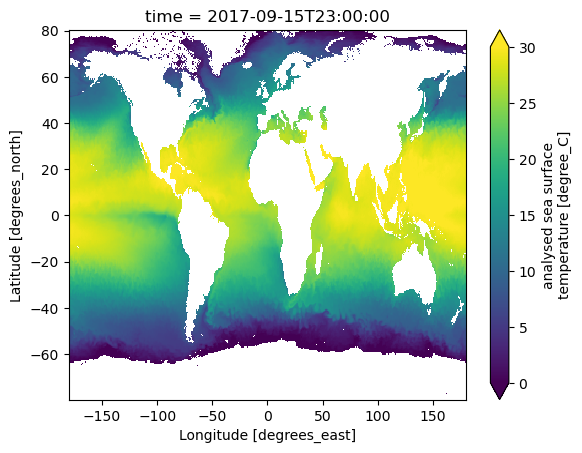

In [7]:
ds.sea_surface_temperature.plot(vmin=0, vmax=30)